In [8]:
import osmnx as ox
import pickle
import folium

In [21]:
# Load the network
with open('../data/raw/osm/Timişoara_Romania_drive.pkl', 'rb') as f:
    G = pickle.load(f)

print(f"Loaded network with {G.number_of_nodes():,} nodes")

Loaded network with 3,126 nodes


In [22]:
# Get network bounds
nodes_gdf = ox.graph_to_gdfs(G, edges=False)
bounds = nodes_gdf.total_bounds  # [minx, miny, maxx, maxy]
center_lat = (bounds[1] + bounds[3]) / 2
center_lon = (bounds[0] + bounds[2]) / 2

print(f"Network center: ({center_lat}, {center_lon})")

Network center: (45.759046999999995, 21.21638885)


In [23]:
# Create a folium map
m = folium.Map(location=[center_lat, center_lon], zoom_start=14)

# Add edges to the map
for u, v, data in G.edges(data=True):
    if 'geometry' in data:
        # If edge has geometry, use it
        points = [(point[1], point[0]) for point in data['geometry'].coords]
    else:
        # Otherwise, draw straight line between nodes
        points = [
            (G.nodes[u]['y'], G.nodes[u]['x']),
            (G.nodes[v]['y'], G.nodes[v]['x'])
        ]

    folium.PolyLine(
        points,
        color='blue',
        weight=2,
        opacity=0.6
    ).add_to(m)

# Optionally add nodes (can be slow for large networks, comment out if needed)
for node, data in G.nodes(data=True):
    folium.CircleMarker(
        location=[data['y'], data['x']],
        radius=2,
        color='red',
        fill=True,
        popup=data.get('name', f'Node {node}')
    ).add_to(m)

m.save('outputs/network_visualization.html')
print("Map saved to outputs/network_visualization.html")

Map saved to outputs/network_visualization.html


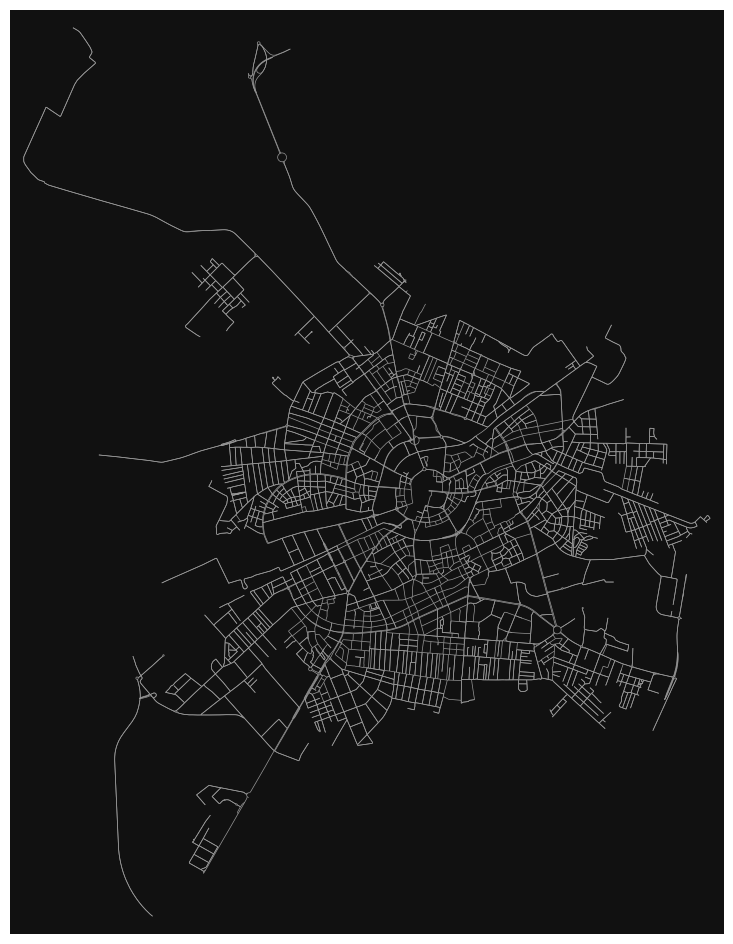

Static map saved to outputs/network_static.png


In [24]:
# Static plot - this should still work
fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.5, figsize=(12, 12))
fig.savefig('outputs/network_static.png', dpi=150, bbox_inches='tight')
print("Static map saved to outputs/network_static.png")